## Import

In [30]:
# Matplotlib
import matplotlib.pyplot
# Tensorflow
import tensorflow
# Numpy and Pandas
import numpy
import pandas
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler


## Be sure to used Tensorflow 2.0

In [31]:
assert hasattr(tensorflow, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [32]:
# Fashio MNIST
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

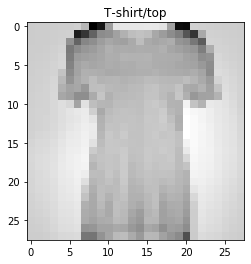

In [33]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
matplotlib.pyplot.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
matplotlib.pyplot.title(targets_names[targets[10]])
matplotlib.pyplot.show()

In [5]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Add the layers

In [34]:
# Flatten
model = tensorflow.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tensorflow.keras.layers.Dense(256, activation="relu"))
model.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model.add(tensorflow.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.0287964  0.01462741 0.20828186 0.3458108  0.01240659 0.09051364
  0.07157212 0.10852581 0.10636894 0.01309639]] [9]


## Model Summary

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  200960    
_________________________________________________________________
dense_4 (Dense)              multiple                  32896     
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [36]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Caterogical cross entropy

In [37]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output", outputs_test)

#print("\nLabels", labels_test)

filtered_outputs_test = outputs_test[numpy.arange(5), labels_test]
print("\nFiltered output", filtered_outputs_test)

log_filtered_output = numpy.log(filtered_outputs_test)
print("\nLog Filtered output", log_filtered_output)

print("Mean", log_filtered_output.mean())
print("Mean", -log_filtered_output.mean())

(5, 784)
[9 0 0 3 0]
(5, 10)
Output [[0.0287964  0.01462741 0.208282   0.34581065 0.01240659 0.09051365
  0.07157211 0.1085258  0.10636889 0.01309639]
 [0.01035237 0.05240931 0.14116865 0.10446715 0.03776509 0.13309024
  0.3129775  0.08053279 0.08495631 0.04228054]
 [0.08299007 0.14500193 0.14236517 0.13659889 0.05959931 0.0710544
  0.07657664 0.12096312 0.09263289 0.07221767]
 [0.06402009 0.11612035 0.15985107 0.17604695 0.04894171 0.06080274
  0.08160784 0.15828818 0.09060891 0.0437122 ]
 [0.02870922 0.05158531 0.34219623 0.09840803 0.04856291 0.08666514
  0.05900655 0.11663088 0.0859972  0.08223851]]

Filtered output [0.01309639 0.01035237 0.08299007 0.17604695 0.02870922]

Log Filtered output [-4.335419  -4.5705395 -2.4890344 -1.7370045 -3.550537 ]
Mean -3.3365066
Mean 3.3365066


## Train the model

In [38]:
history = model.fit(images, targets, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 0s 46us/sample - loss: 1.6341 - accuracy: 0.4903
Epoch 2/10
10000/10000 [==============================] - 1s 61us/sample - loss: 1.0043 - accuracy: 0.6904
Epoch 3/10
10000/10000 [==============================] - 0s 47us/sample - loss: 0.8327 - accuracy: 0.7357
Epoch 4/10
10000/10000 [==============================] - 0s 48us/sample - loss: 0.7432 - accuracy: 0.7582
Epoch 5/10
10000/10000 [==============================] - 0s 47us/sample - loss: 0.6854 - accuracy: 0.7739
Epoch 6/10
10000/10000 [==============================] - 1s 52us/sample - loss: 0.6435 - accuracy: 0.7837
Epoch 7/10
10000/10000 [==============================] - 0s 49us/sample - loss: 0.6107 - accuracy: 0.7944
Epoch 8/10
10000/10000 [==============================] - 0s 49us/sample - loss: 0.5839 - accuracy: 0.7993
Epoch 9/10
10000/10000 [==============================] - 0s 49us/sample - loss: 0.5616 - accuracy: 0.8074
Epoch 10/10
10000/10000 [============

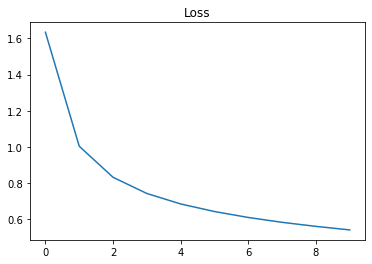

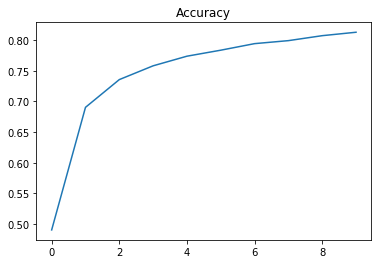

In [40]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

matplotlib.pyplot.plot(loss_curve)
matplotlib.pyplot.title("Loss")
matplotlib.pyplot.show()

matplotlib.pyplot.plot(acc_curve)
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()